# 課題0710

そのまま課題ファイルで編集しないでください。課題ファイルを複製してから課題を回答してください。

In [3]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/lvzeyu/css_tohoku/master/css_tohoku/draft/Data/titanic.csv")

## 課題1

以下の図を再現してください

- 年齢の分布を、異なる階級幅を使って、4つのサブプロットをわけて描画する
   - 階級幅を適当で決めてよい
- 各サブプロットには、
    - x軸ラベル、y軸ラベル、サブプロット番号(a-d)を指定する
    - 水平方向のグリッド線を追加する
    - ヒストグラムの色を`lightblue`に変更する

![](./Figure1.png)

In [4]:
# 変数名の表示
print(df.columns)

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'survived'],
      dtype='object')


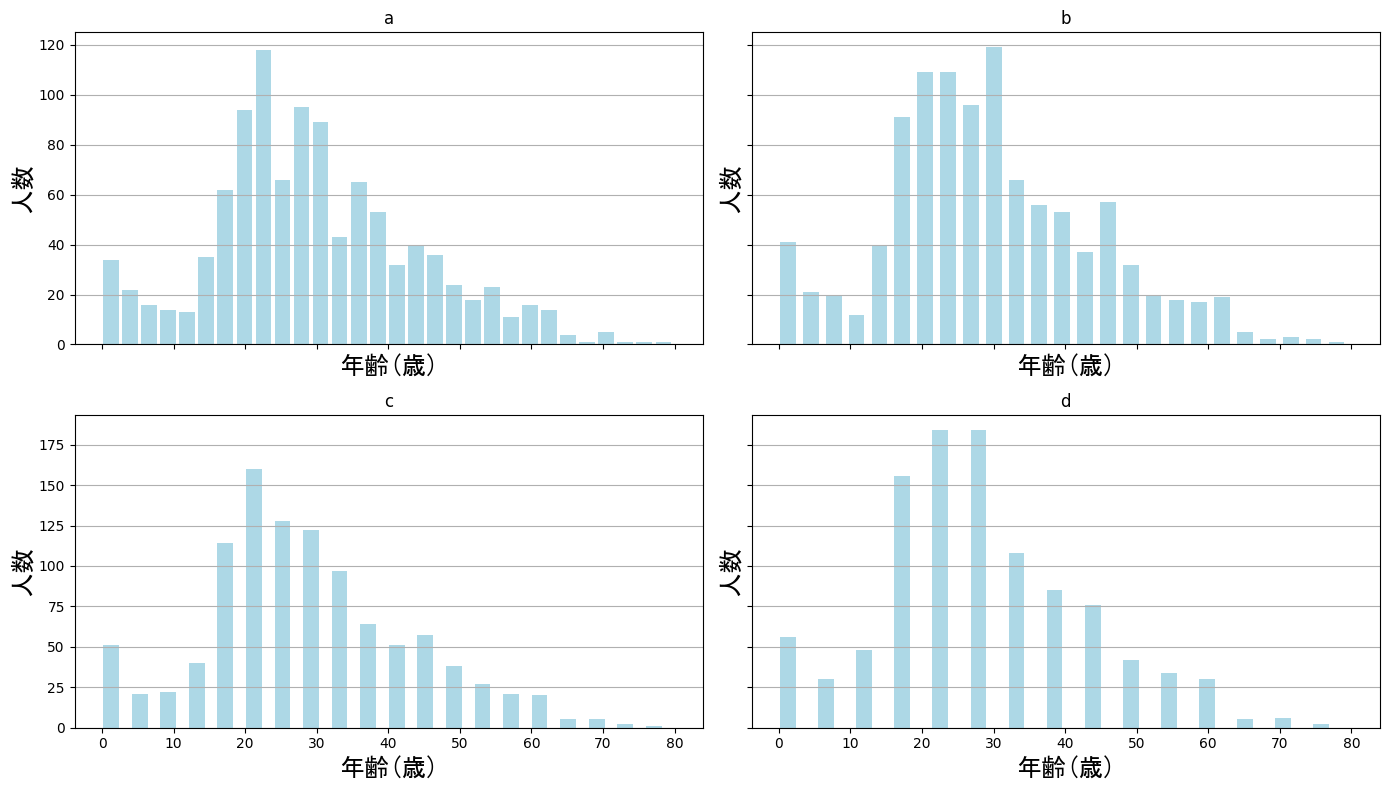

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
#年齢データから欠損値を除去
age_data=df['age'].dropna()

#年齢ごとに人数を集計し、年齢順に並びかえる
age_count=age_data.value_counts().sort_index()

#2x2のサブプロットグリッドを作成
fig,axs=plt.subplots(2,2,sharex="col",sharey="row",figsize=(14, 8))

#4つの階級幅を設定
bin_settings=[30,25,20,15]

#階級幅ごとのタイトル
titles=["a","b","c","d"]

#それぞれの階級幅でヒストグラムを作成
for a,b,c in zip(axs.flat,bin_settings,titles):
    a.hist(age_data,bins=b,color='lightblue',width=2.2)
    a.set_title(c)
    a.set_xlabel('年齢(歳)',fontsize=18,fontname='MS Gothic')
    a.set_ylabel('人数',fontsize = 18, fontname='MS Gothic')
    a.grid(axis="y")

#レイアウトを調整
plt.tight_layout()

#結果
plt.show()

## 課題2

以下の図を再現してください

- 男性乗客と女性乗客の年齢の分布をそれぞれ描画する
- 全乗客の年齢分布を示す灰色ヒストグラムも描画する
- 図のタイトル、x軸ラベル、y軸ラベル、凡例を設定する

![](./Figure2.png)

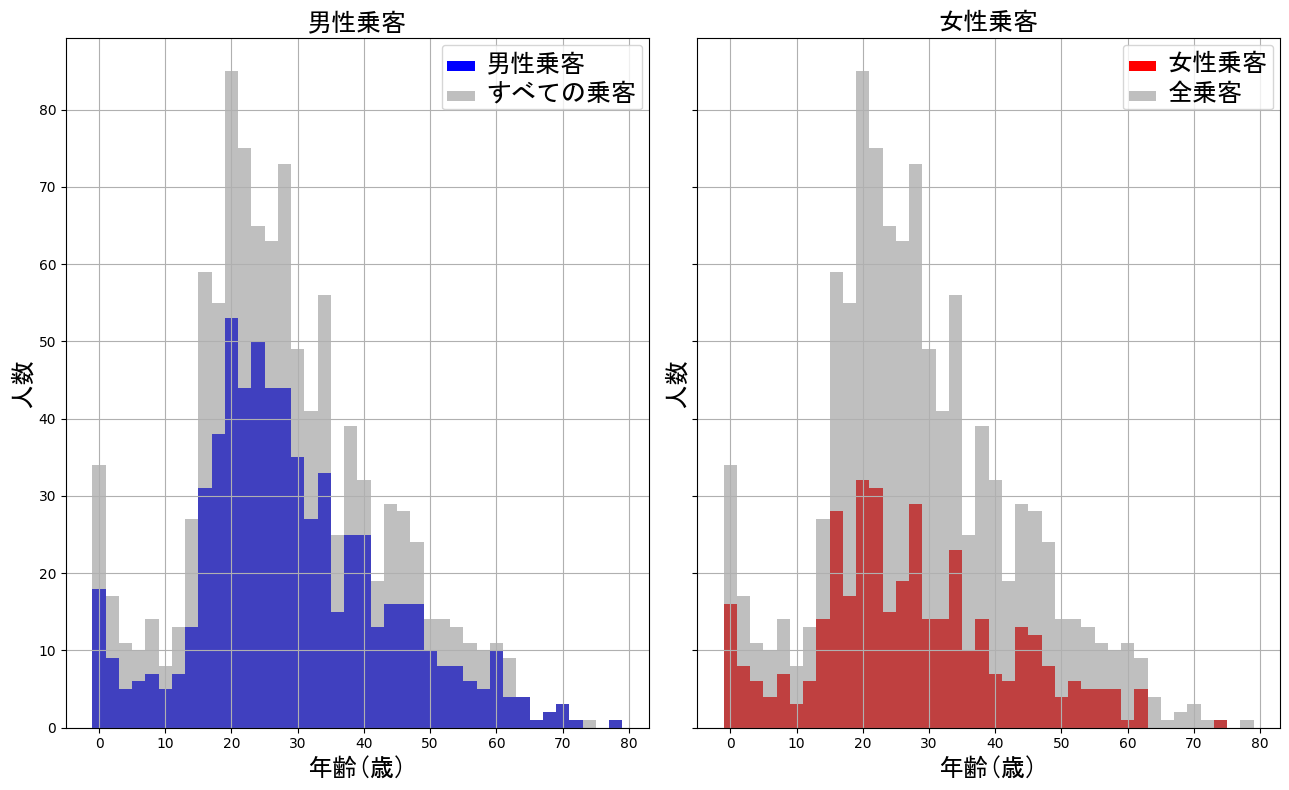

In [38]:
#年齢データから欠損値を除去
age_data = df['age'].dropna()

#1x2のサブプロットグリッドを作成
fig,axs=plt.subplots(1,2,sharex=True,sharey=True,figsize=(13, 8))

#性別ごとのデータをフィルタリング
male_data=df[df['sex']=='male']['age'].dropna()
female_data=df[df['sex']=='female']['age'].dropna()

#データの最大値からbinsを設定
max_age=int(max(male_data.max(),female_data.max()))
bins=range(0,max_age+2,2)

#各データをbinsにそって集計と並び替えを行い、エラーを防ぐ
#pd.cutでbinsの階級幅にそってデータを分ける

#全乗客データ
total_age_count=pd.cut(age_data,bins=bins).value_counts().sort_index()

#男性乗客データ
male_age_count=pd.cut(male_data,bins=bins).value_counts().sort_index()

#女性乗客データ
female_age_count=pd.cut(female_data,bins=bins).value_counts().sort_index()

#棒グラフの幅の大きさを調整し、ヒストグラムになるように
width=2

# 性別ごとにヒストグラムを作成
#男性と全乗客
axs[0].bar(male_age_count.index.categories.left,male_age_count.values,width=width,color='blue',label='男性乗客')
axs[0].bar(total_age_count.index.categories.left,total_age_count.values,width=width,color='gray',alpha=0.5,label='すべての乗客')
axs[0].set_xlabel('年齢(歳)',fontsize=18,fontname='MS Gothic')
axs[0].set_ylabel('人数',fontsize=18,fontname='MS Gothic')
axs[0].set_title('男性乗客',fontsize=18,fontname='MS Gothic')
axs[0].grid(True)
#凡例の追加とフォントの指定
legend0 = axs[0].legend()
for text in legend0.get_texts():
    text.set_fontsize(18)
    text.set_fontname('MS Gothic') 



#女性と全乗客
axs[1].bar(female_age_count.index.categories.left,female_age_count.values,width=width,color='red',label='女性乗客')
axs[1].bar(total_age_count.index.categories.left,total_age_count.values,width=width,color='gray',alpha=0.5,label='全乗客')
axs[1].set_xlabel('年齢(歳)',fontsize=18,fontname='MS Gothic')
axs[1].set_ylabel('人数',fontsize=18,fontname='MS Gothic')
axs[1].set_title('女性乗客',fontsize=18,fontname='MS Gothic')
axs[1].grid(True)
#凡例の追加とフォントの指定
legend0 = axs[1].legend()
for text in legend0.get_texts():
    text.set_fontsize(18)
    text.set_fontname('MS Gothic') 

# レイアウトを調整
plt.tight_layout()
# 結果を表示
plt.show()
